# Zykrr DS  Assignment

### Importing necessary libraries 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import warnings

### Reading the data using pandas

In [2]:
data = pd.read_csv('dataset-ads.csv', header = None, names=['Text_ads'])
data.head()

,Text_ads
0,1 ad-jerry ad-bruckheimer ad-chase ad-premier ...
1,-1 ad-rheumatoid ad-arthritis ad-expert ad-tip...
2,-1 ad-rheumatologist ad-anju ad-varghese ad-yo...
3,-1 ad-siemen ad-water ad-remediation ad-water ...
4,-1 ad-symptom ad-muscle ad-weakness ad-genetic...


### Seperate target variable from feature variable

In [3]:
l = []

for i in data['Text_ads']:
    i = i.split()
    l.append(i[0])
    
print(l[30])
data['target'] = l

-1


In [4]:
l = []

for i in data['Text_ads']:
    i = i.replace(i[:2],'')
    l.append(i)
    
print(l[0])
data['Text_ads'] = l

ad-jerry ad-bruckheimer ad-chase ad-premier ad-sept ad-th ad-clip ad-bruckheimer ad-chase page found


In [5]:
data.head()

,Text_ads,target
0,ad-jerry ad-bruckheimer ad-chase ad-premier ad...,1
1,ad-rheumatoid ad-arthritis ad-expert ad-tip a...,-1
2,ad-rheumatologist ad-anju ad-varghese ad-yonk...,-1
3,ad-siemen ad-water ad-remediation ad-water ad...,-1
4,ad-symptom ad-muscle ad-weakness ad-genetic a...,-1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4143 entries, 0 to 4142
Data columns (total 2 columns):
Text_ads    4143 non-null object
target      4143 non-null object
dtypes: object(2)
memory usage: 64.8+ KB


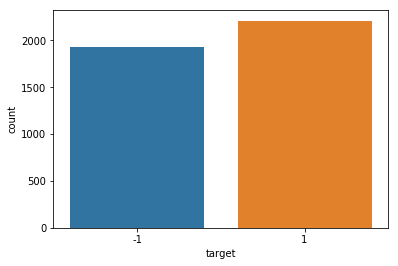

In [7]:
#analyzing the count of rejected and accepted ads

sns.countplot(data['target'])

In [8]:
f = lambda x: len(x['Text_ads'].split()) -1
data['totalwords'] = data.apply(f, axis=1)


In [9]:
data.head()

,Text_ads,target,totalwords
0,ad-jerry ad-bruckheimer ad-chase ad-premier ad...,1,10
1,ad-rheumatoid ad-arthritis ad-expert ad-tip a...,-1,497
2,ad-rheumatologist ad-anju ad-varghese ad-yonk...,-1,81
3,ad-siemen ad-water ad-remediation ad-water ad...,-1,158
4,ad-symptom ad-muscle ad-weakness ad-genetic a...,-1,10


In [10]:
#finding count of ad creative

prefix = "ad-"
l=[]

for i in data['Text_ads']:
    prefix_count = 0
    i = i.split()
    for s in i:
        if s.startswith(prefix):
            prefix_count += 1
    l.append(prefix_count)
    
data['Creative_ad'] = l    

In [11]:
#finding count of header

prefix = "header-"
l=[]

for i in data['Text_ads']:
    prefix_count = 0
    i = i.split()
    for s in i:
        if s.startswith(prefix):
            prefix_count += 1
    l.append(prefix_count)
    
data['header_ad'] = l

In [12]:
#finding count of title

prefix = "title-"
l=[]

for i in data['Text_ads']:
    prefix_count = 0
    i = i.split()
    for s in i:
        if s.startswith(prefix):
            prefix_count += 1
    l.append(prefix_count)
    
data['title_ad'] = l    

In [13]:
#final dataset after adding some extra features
data.head()

,Text_ads,target,totalwords,Creative_ad,header_ad,title_ad
0,ad-jerry ad-bruckheimer ad-chase ad-premier ad...,1,10,9,0,0
1,ad-rheumatoid ad-arthritis ad-expert ad-tip a...,-1,497,9,3,5
2,ad-rheumatologist ad-anju ad-varghese ad-yonk...,-1,81,10,0,2
3,ad-siemen ad-water ad-remediation ad-water ad...,-1,158,9,0,2
4,ad-symptom ad-muscle ad-weakness ad-genetic a...,-1,10,9,0,0


In [14]:
#normalizing the dataset

scaler = preprocessing.MinMaxScaler()
data_t = data[['totalwords', 'Creative_ad', 'title_ad', 'header_ad', 'target']]
data_t = scaler.fit_transform(data_t)

c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:

columns = ['totalwords', 'Creative_ad', 'title_ad', 'header_ad', 'target']
df_normalized = pd.DataFrame(data_t, columns = columns)
df_normalized.head(10)

,totalwords,Creative_ad,title_ad,header_ad,target
0,0.000725,0.013834,0.000000,0.000000,1.0
1,0.051197,0.013834,0.043860,0.006186,0.0
2,0.008084,0.015810,0.017544,0.000000,0.0
3,0.016064,0.013834,0.017544,0.000000,0.0
4,0.000725,0.013834,0.000000,0.000000,0.0
5,0.000518,0.009881,0.000000,0.000000,1.0
6,0.001140,0.021739,0.000000,0.000000,0.0
7,0.036999,0.007905,0.035088,0.008247,0.0
8,0.018344,0.021739,0.070175,0.000000,0.0
9,0.014302,0.021739,0.017544,0.006186,1.0


In [16]:
df_normalized['Ads'] = data['Text_ads']
df_normalized.head()

,totalwords,Creative_ad,title_ad,header_ad,target,Ads
0,0.000725,0.013834,0.000000,0.000000,1.0,ad-jerry ad-bruckheimer ad-chase ad-premier ad...
1,0.051197,0.013834,0.043860,0.006186,0.0,ad-rheumatoid ad-arthritis ad-expert ad-tip a...
2,0.008084,0.015810,0.017544,0.000000,0.0,ad-rheumatologist ad-anju ad-varghese ad-yonk...
3,0.016064,0.013834,0.017544,0.000000,0.0,ad-siemen ad-water ad-remediation ad-water ad...
4,0.000725,0.013834,0.000000,0.000000,0.0,ad-symptom ad-muscle ad-weakness ad-genetic a...


In [17]:
#converting all the columns into integer
df_normalized['target']=df_normalized['target'].astype(np.int)
df_normalized['totalwords']=df_normalized['totalwords'].astype(np.int)
df_normalized['title_ad']=df_normalized['title_ad'].astype(np.int)
df_normalized['header_ad']=df_normalized['header_ad'].astype(np.int)
df_normalized['Creative_ad']=df_normalized['Creative_ad'].astype(np.int)

In [18]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

In [19]:
#most frequent words 
gen_freq(df_normalized.Ads.str).head()

list       21463
product    17605
com        11767
health      8434
save        8406
dtype: int64

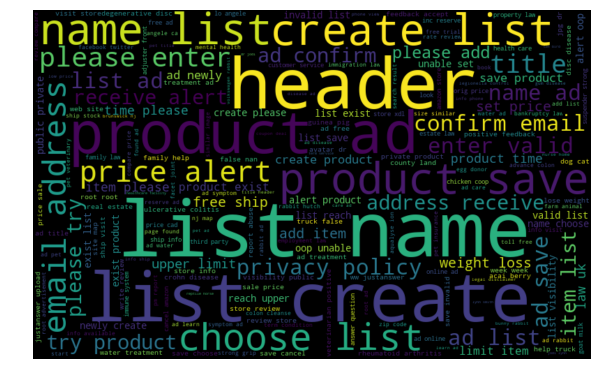

In [20]:
#word cloud of most frequent words in the dataset
all_words = ' '.join([text for text in df_normalized['Ads']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

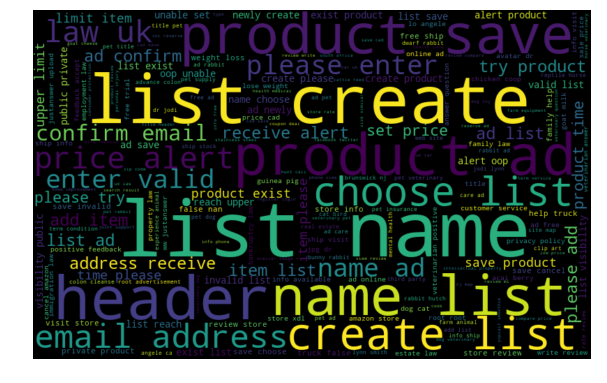

In [21]:
#most frequent words when the ad is accepted
normal_words =' '.join([text for text in df_normalized['Ads'][df_normalized['target'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

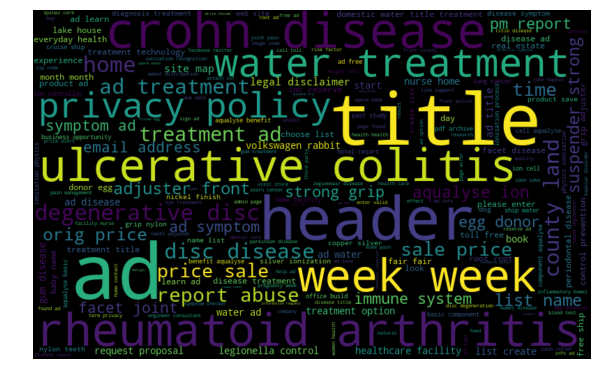

In [22]:
#most frequent words when the ad is rejected
normal_words =' '.join([text for text in df_normalized['Ads'][df_normalized['target'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Training the model and Predicting the output 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df_normalized['Ads'])

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df_normalized['Ads'])

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

#logistic regression on bag of words matrix
# splitting data into training and test set
xtrain, xtest, ytrain, ytest = train_test_split(bow, df_normalized['target'], random_state=42, test_size=0.25)

lreg = LogisticRegression()
lreg.fit(xtrain, ytrain) # training the model

prediction = lreg.predict_proba(xtest) # predicting on the test set
prediction_int = prediction[:,1] >= 0.5
prediction_int = prediction_int.astype(np.int)

print("F1 Score:",f1_score(ytest, prediction_int))

c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 Score: 0.8849557522123894


c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(ytest, prediction_int)
cm

array([[406,  73],
       [ 57, 500]], dtype=int64)

In [53]:
print("Accuracy:",metrics.accuracy_score(ytest, prediction_int))

Accuracy: 0.8745173745173745


In [54]:
#logistic regression on tfidf matrix

# splitting data into training and test set
xtrain, xtest, ytrain, ytest = train_test_split(tfidf, df_normalized['target'], random_state=42, test_size=0.25)

lreg = LogisticRegression()
lreg.fit(xtrain, ytrain) # training the model

prediction = lreg.predict_proba(xtest) # predicting on the test set
prediction_int = prediction[:,1] >= 0.5
prediction_int = prediction_int.astype(np.int)

print("F1 Score:",f1_score(ytest, prediction_int))

F1 Score: 0.9028871391076115


c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(ytest, prediction_int)
cm

array([[409,  70],
       [ 41, 516]], dtype=int64)

In [56]:
print("F1 Score:",f1_score(ytest, prediction_int))

F1 Score: 0.9028871391076115


In [57]:
#Random forest classifier on tfidf matrix

xtrain, xtest, ytrain, ytest = train_test_split(tfidf, df_normalized['target'], random_state=42, test_size=0.25)

lreg =  RandomForestClassifier(n_estimators=100, random_state=0)
lreg.fit(xtrain, ytrain) # training the model

prediction = lreg.predict_proba(xtest) # predicting on the test set
prediction_int = prediction[:,1] >= 0.5
prediction_int = prediction_int.astype(np.int)

print("F1 Score:",f1_score(ytest, prediction_int))

F1 Score: 0.9065502183406113


In [58]:
cm = confusion_matrix(ytest, prediction_int)
cm

array([[410,  69],
       [ 38, 519]], dtype=int64)

In [59]:
print("Accuracy:",metrics.accuracy_score(ytest, prediction_int))

Accuracy: 0.8967181467181468


In [60]:
#Random forest classifier on bag of words matrix

xtrain, xtest, ytrain, ytest = train_test_split(bow, df_normalized['target'], random_state=42, test_size=0.25)

lreg =  RandomForestClassifier(n_estimators=100, random_state=0)
lreg.fit(xtrain, ytrain) # training the model

prediction = lreg.predict_proba(xtest) # predicting on the test set
prediction_int = prediction[:,1] >= 0.5
prediction_int = prediction_int.astype(np.int)

print("F1 Score:",f1_score(ytest, prediction_int))

F1 Score: 0.9011373578302713


In [61]:
cm = confusion_matrix(ytest, prediction_int)
cm

array([[408,  71],
       [ 42, 515]], dtype=int64)

In [62]:
print("Accuracy:",metrics.accuracy_score(ytest, prediction_int))

Accuracy: 0.890926640926641


**Accuracy of Random forest classifier is more than logistic regression classifier as it is the ensemble machine learning algorithm which combines the output of various decision trees and predicts the correct output**  